In [55]:
import tensorflow as tf
from tensorflow.keras import layers

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Reshape the input data to 4D tensor for use with convolutional layers
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

# Normalize the input data
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# Convert the target labels to one-hot encoding
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

# Define the model
model = tf.keras.Sequential([
    layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train, batch_size=128, epochs=10, validation_data=(x_test, y_test))

# Evaluate the model on the test set
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


Epoch 1/10
469/469 [==============================] - 57s 118ms/step - loss: 0.2996 - accuracy: 0.9092 - val_loss: 0.0594 - val_accuracy: 0.9812
Epoch 2/10
469/469 [==============================] - 53s 114ms/step - loss: 0.0963 - accuracy: 0.9719 - val_loss: 0.0429 - val_accuracy: 0.9859
Epoch 3/10
469/469 [==============================] - 53s 113ms/step - loss: 0.0720 - accuracy: 0.9793 - val_loss: 0.0350 - val_accuracy: 0.9889
Epoch 4/10
469/469 [==============================] - 54s 116ms/step - loss: 0.0584 - accuracy: 0.9827 - val_loss: 0.0311 - val_accuracy: 0.9895
Epoch 5/10
469/469 [==============================] - 57s 121ms/step - loss: 0.0499 - accuracy: 0.9850 - val_loss: 0.0296 - val_accuracy: 0.9897
Epoch 6/10
469/469 [==============================] - 54s 115ms/step - loss: 0.0436 - accuracy: 0.9868 - val_loss: 0.0282 - val_accuracy: 0.9901
Epoch 7/10
469/469 [==============================] - 54s 115ms/step - loss: 0.0389 - accuracy: 0.9877 - val_loss: 0.0240 - val_ac

In [ ]:
# So we got test accuracy of 99.26% which is quite good

In [88]:
import matplotlib.pyplot as plt

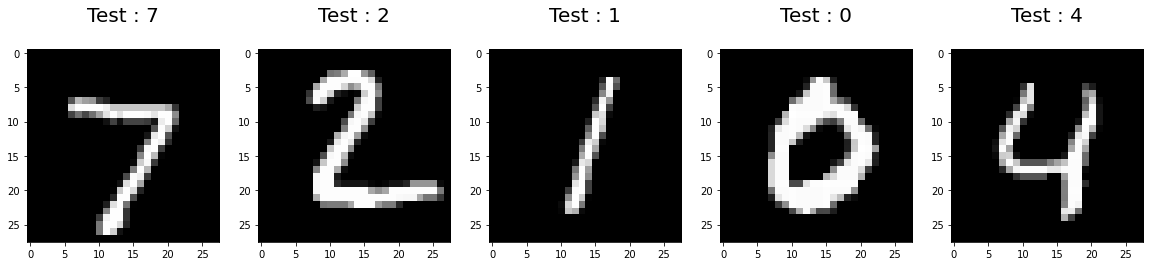

In [106]:
plt.figure(figsize = (20,4))
for index,(image,label) in enumerate(zip(x_test[0:5],y_test[0:5])):
    plt.subplot(1,5,index + 1)
    plt.imshow(np.reshape(image,(28,28)),cmap = plt.cm.gray)
    label_ = np.argmax(label)
    plt.title('Test : %i\n' %label_,fontsize = 20)

In [95]:
pred = model.predict(x_test)

313/313 [==============================] - 4s 14ms/step


In [96]:
n = len(pred)
y_pred = np.zeros(n)
for i in range(n):
  y_pred[i] = np.argmax(pred[i])

y_pred

array([7., 2., 1., ..., 4., 5., 6.])

In [97]:
y_pred[:5] 

array([7., 2., 1., 0., 4.])

In [ ]:
# so our predictions for first 5 tests are correct